In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r'/content/prj1_data.csv')
data

,YEAR,DOY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,TS,T2M,T2MDEW,T2M_RANGE,PRECTOTCORR,QV2M,PS,WS10M_RANGE,WS2M,WS2M_RANGE
0,2010,1,0.17,0.03,4.59,-0.14,-6.26,-7.85,2.06,1.43,2.08,100.31,2.61,6.73,2.04
1,2010,2,0.16,0.03,4.66,-1.09,-8.74,-9.47,3.70,0.81,1.77,100.71,2.87,6.86,2.13
2,2010,3,0.17,0.03,4.30,-0.10,-6.20,-7.41,2.27,0.07,2.14,100.69,1.28,6.84,0.97
3,2010,4,0.12,0.02,3.28,0.23,-5.31,-6.45,2.65,0.87,2.32,100.23,0.63,7.23,0.56
4,2010,5,0.11,0.02,3.20,0.55,-4.11,-5.85,1.39,0.10,2.44,100.03,2.18,6.17,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468,2022,86,1.05,0.21,13.80,1.05,-1.73,-8.24,2.93,0.00,2.01,99.95,5.04,5.56,4.30
4469,2022,87,1.02,0.20,13.87,1.35,-1.95,-7.49,1.56,0.00,2.14,100.37,3.73,4.48,3.16
4470,2022,88,0.55,0.11,6.45,2.37,1.69,-3.28,5.27,0.03,3.05,99.73,8.49,6.66,6.51
4471,2022,89,0.28,0.05,3.30,4.87,7.81,7.75,8.12,25.94,6.96,97.38,9.05,5.43,7.45


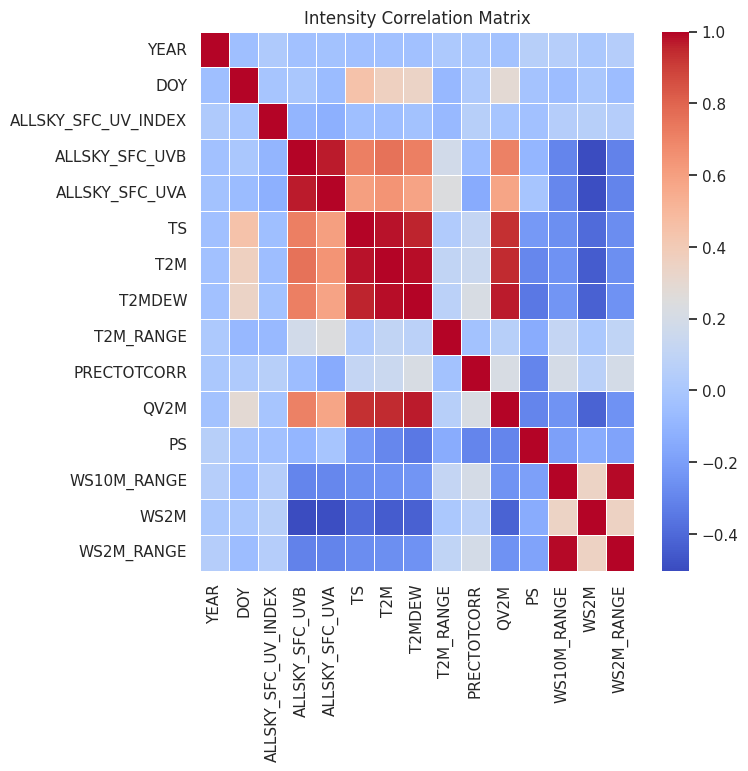

In [57]:
# Select the columns containing intensity data
intensity_columns = ['YEAR', 'DOY','ALLSKY_SFC_UV_INDEX',	'ALLSKY_SFC_UVB','ALLSKY_SFC_UVA',
                     	'TS',	'T2M',	'T2MDEW' ,	'T2M_RANGE',	'PRECTOTCORR',	'QV2M',	'PS', 'WS10M_RANGE','WS2M','WS2M_RANGE']

# Extract the relevant columns from the DataFrame
intensity_data = data[intensity_columns]

# Calculate the intensity correlation matrix
correlation_matrix = intensity_data.corr()

# Plot the intensity correlation matrix as a heatmap using Seaborn
sns.set(style='white')  # Set the style of the plot
plt.figure(figsize=(7, 7))  # Adjust the figure size if needed

sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.title('Intensity Correlation Matrix')
plt.show()

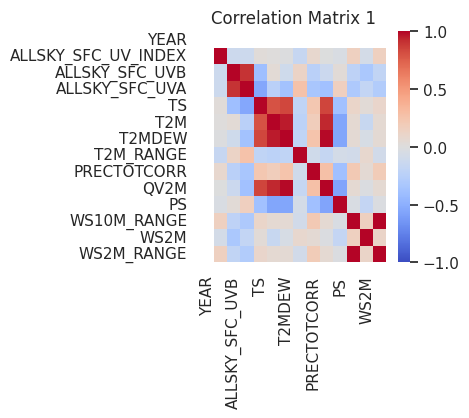

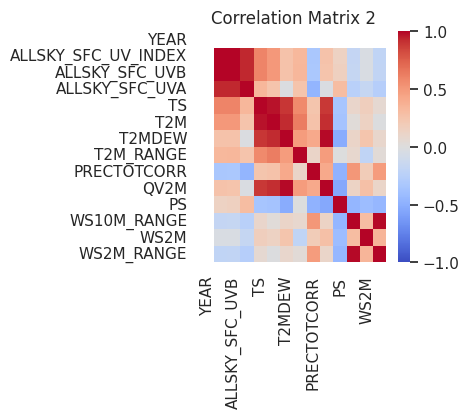

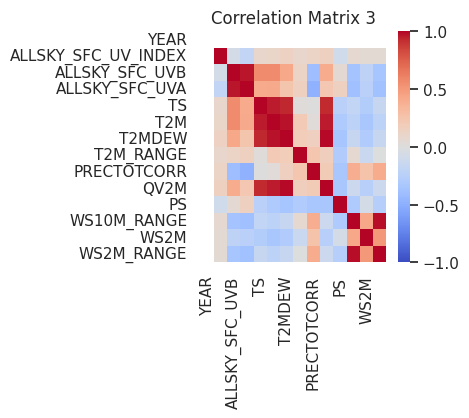

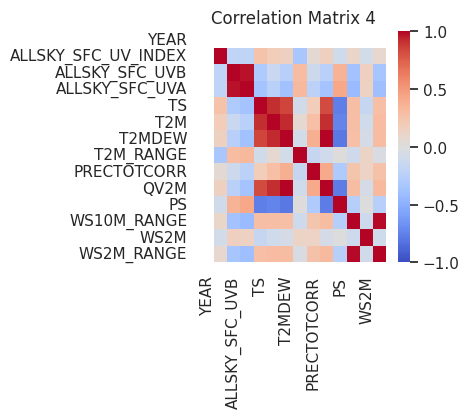

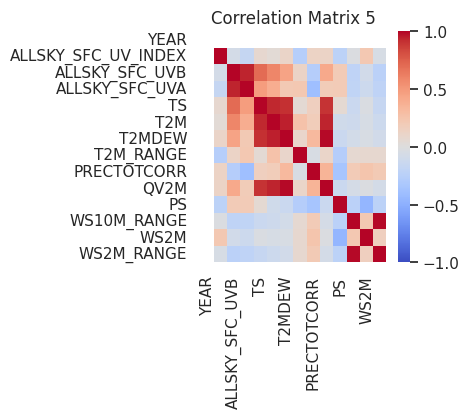

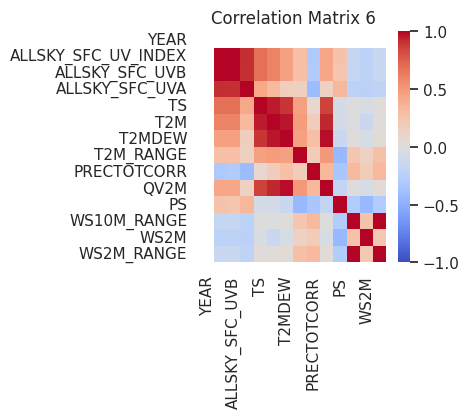

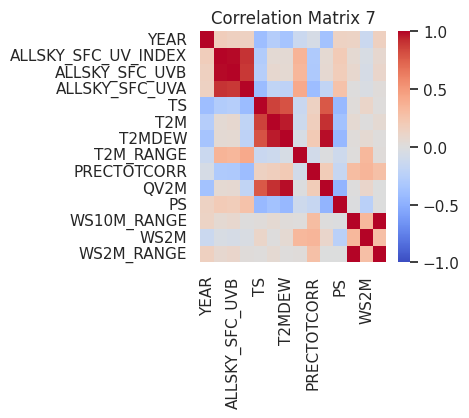

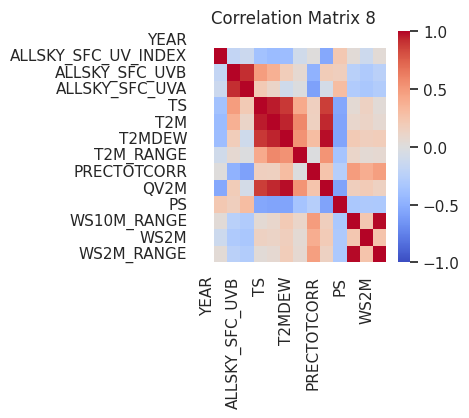

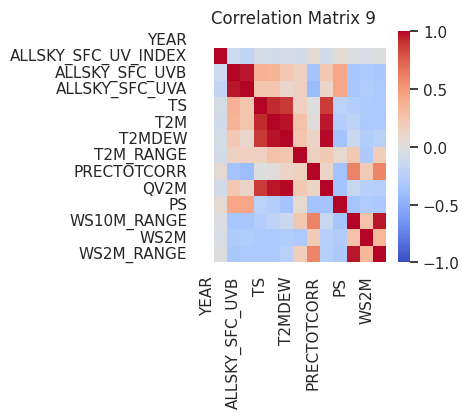

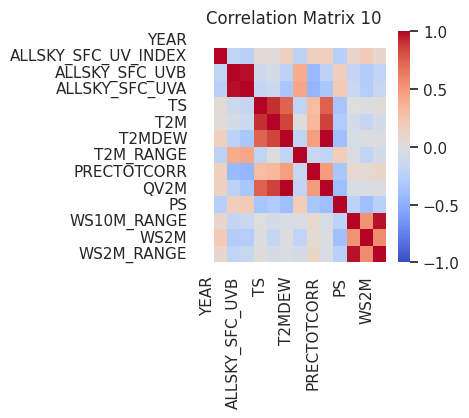

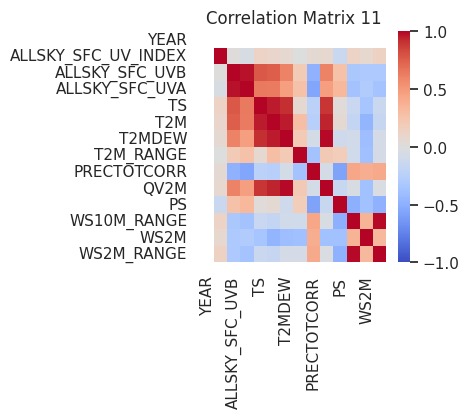

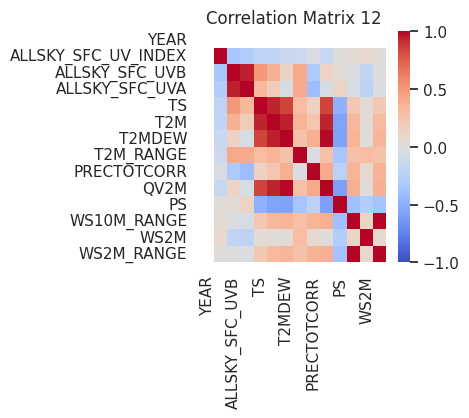

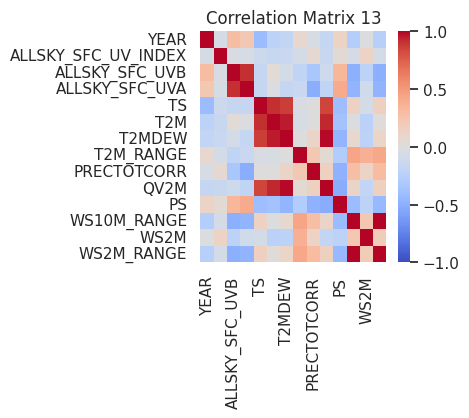

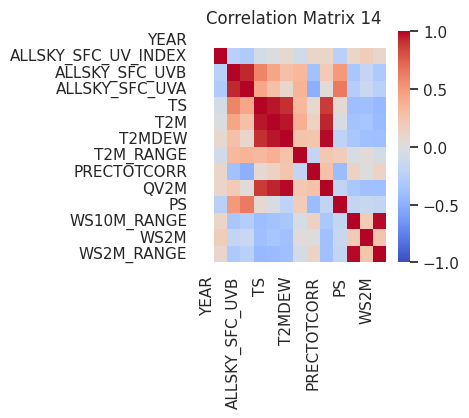

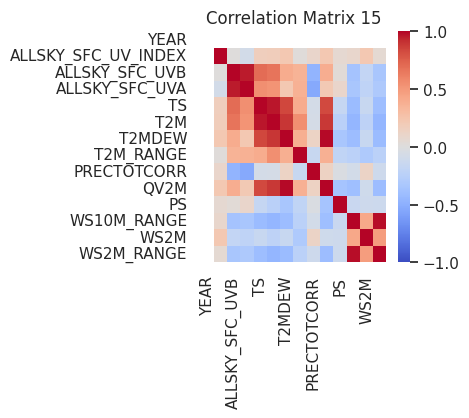

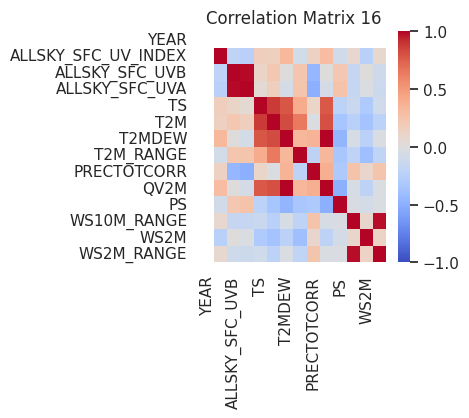

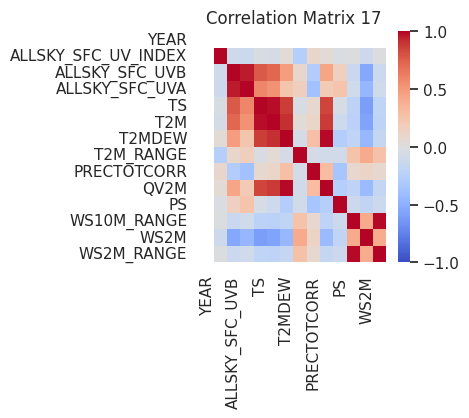

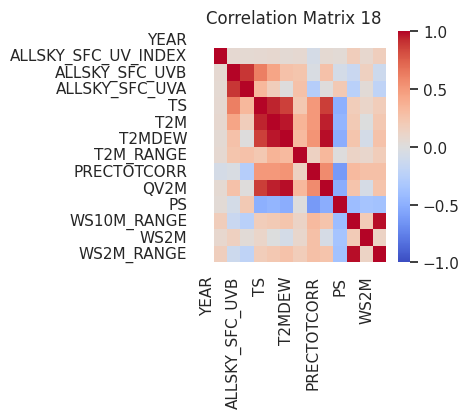

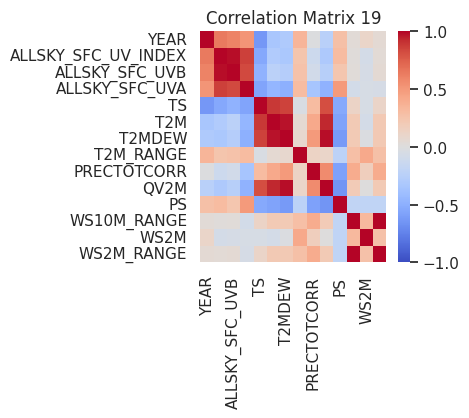

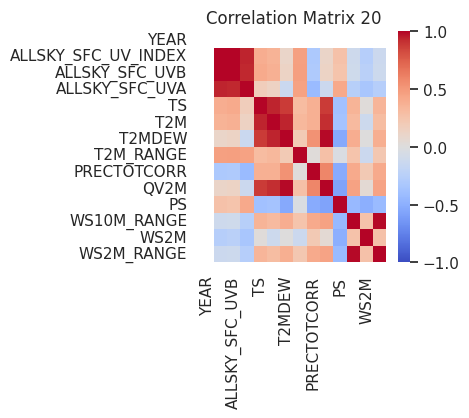

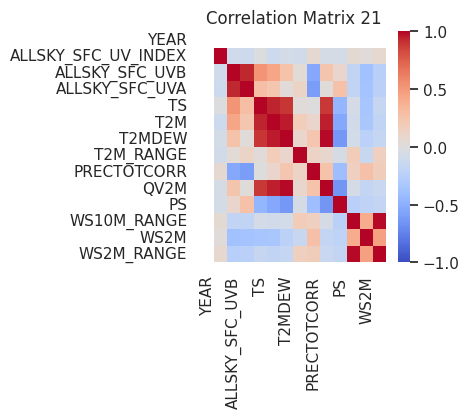

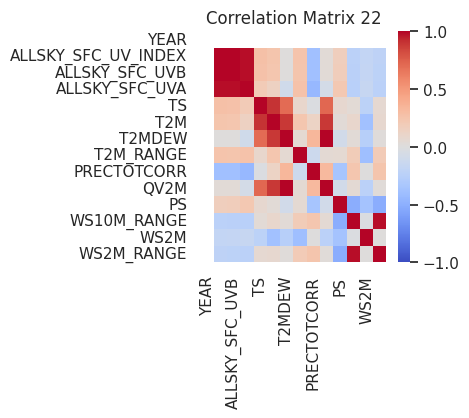

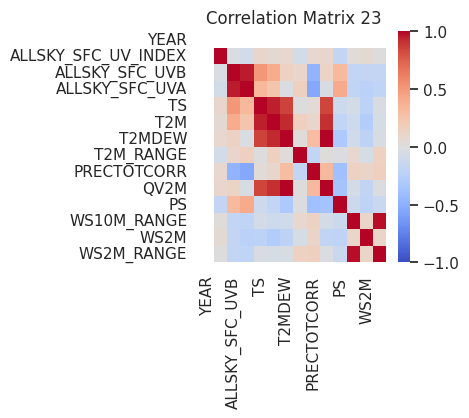

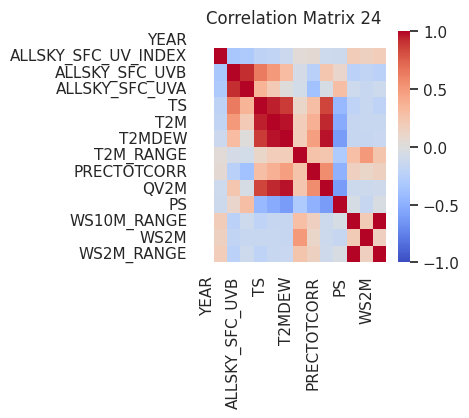

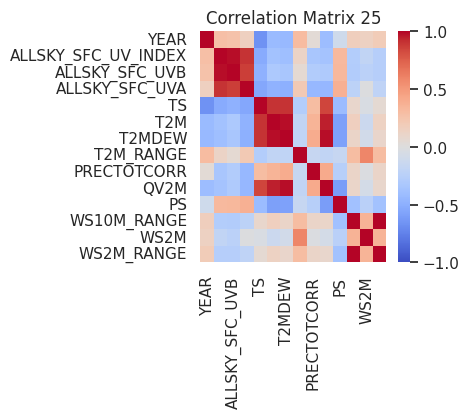

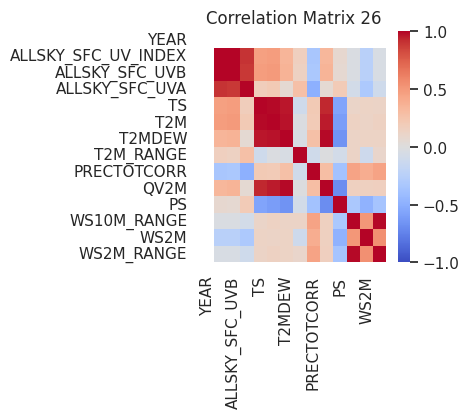

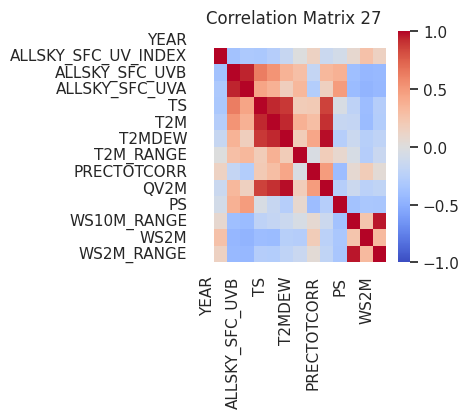

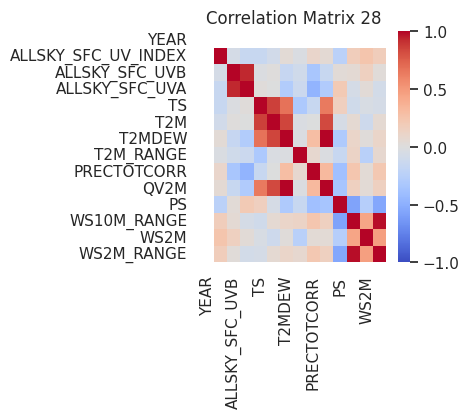

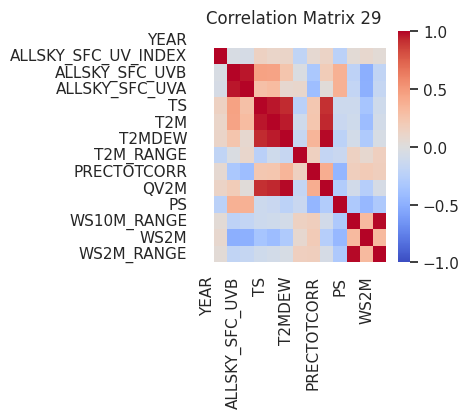

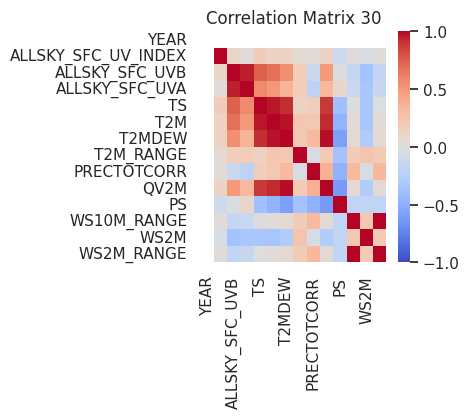

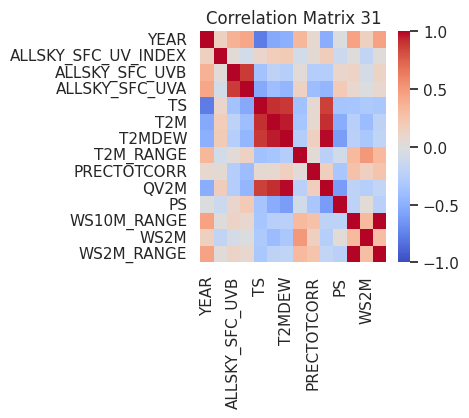

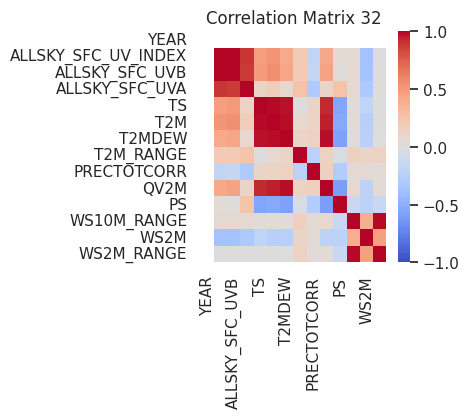

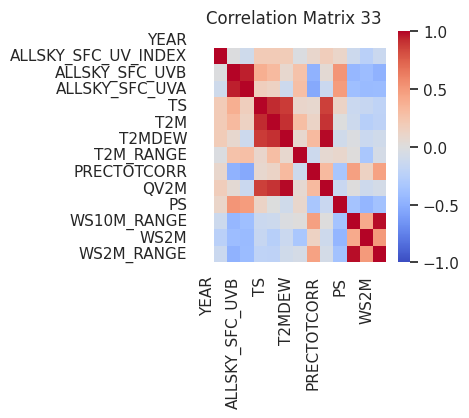

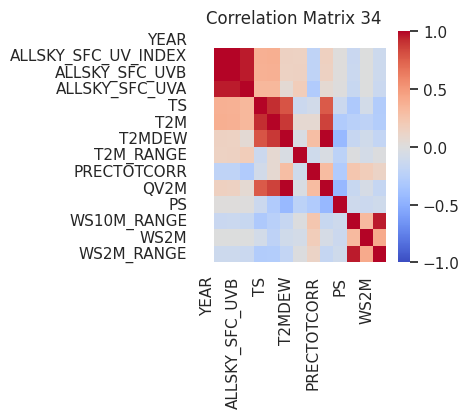

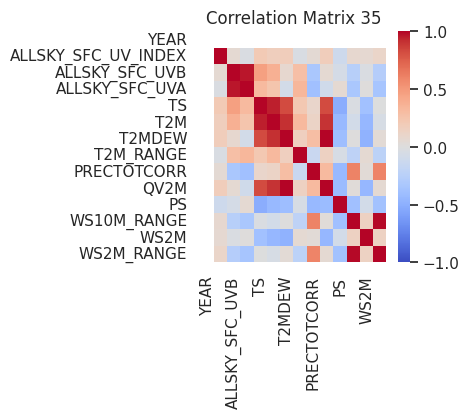

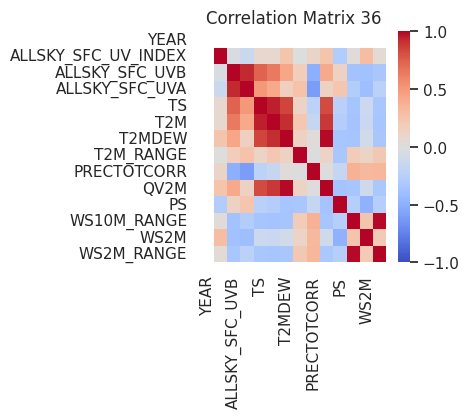

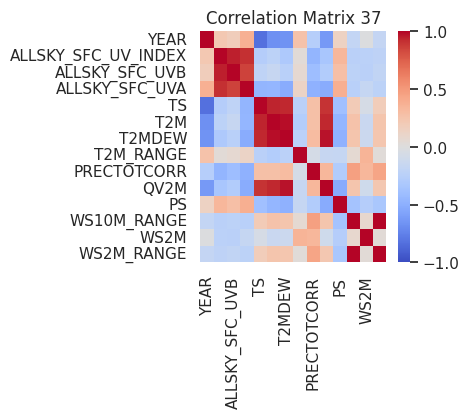

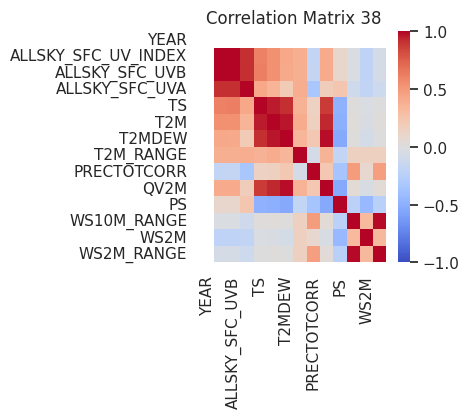

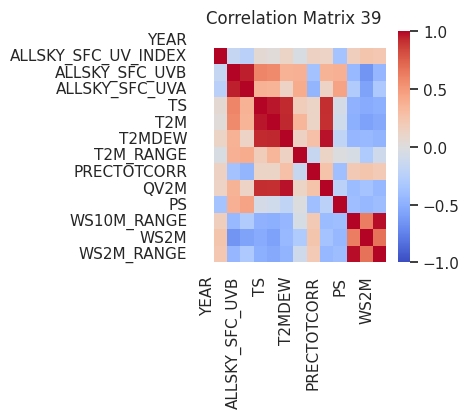

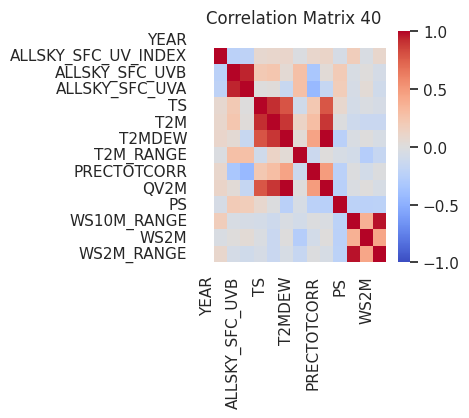

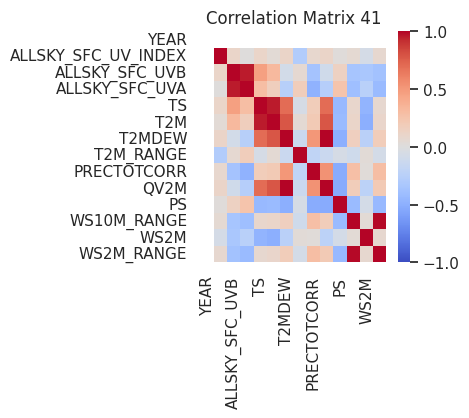

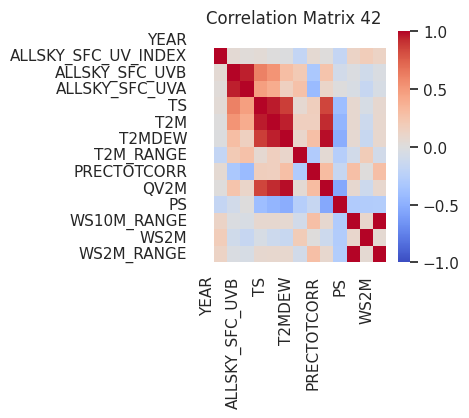

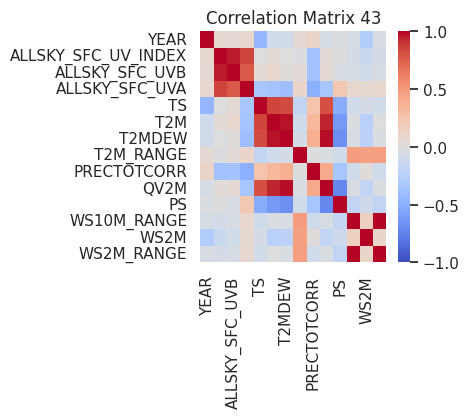

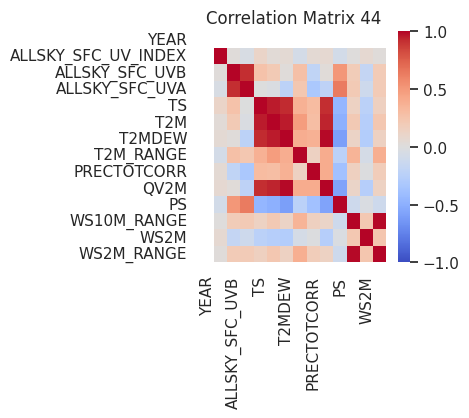

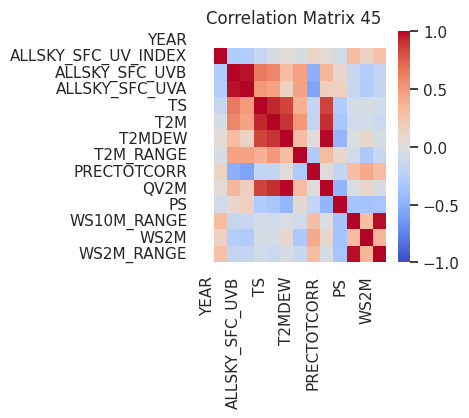

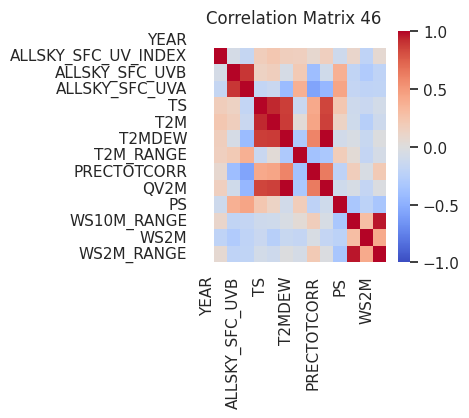

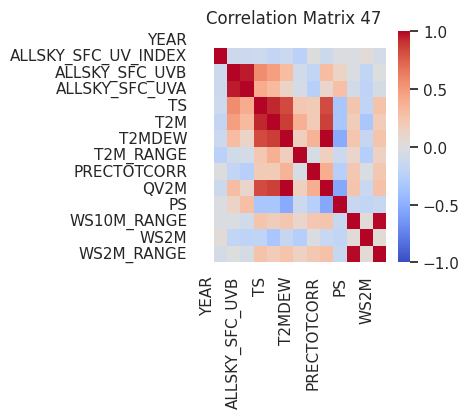

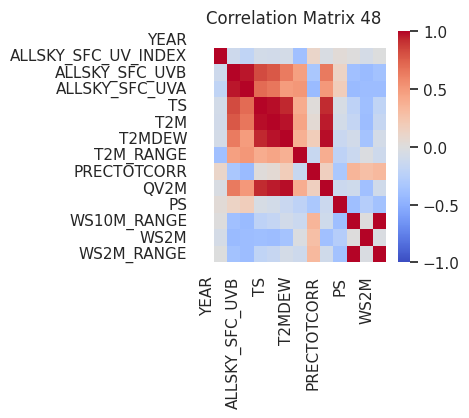

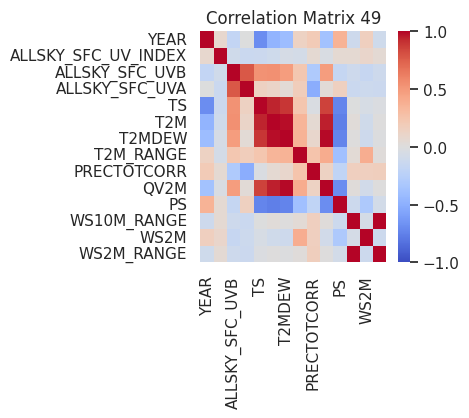

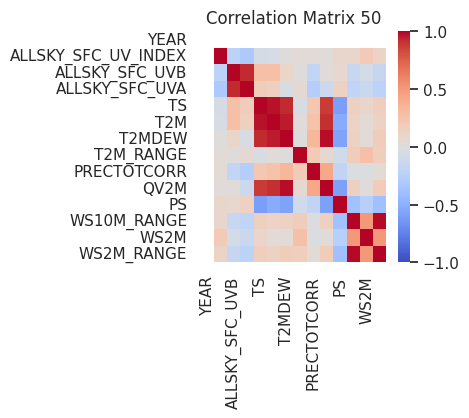

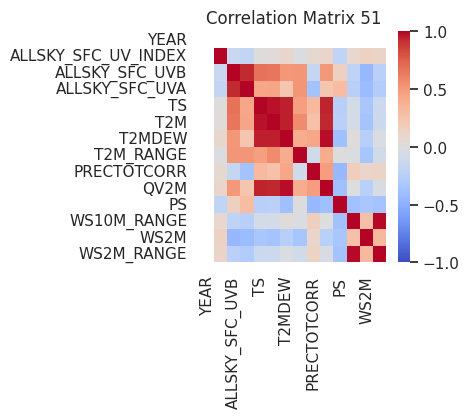

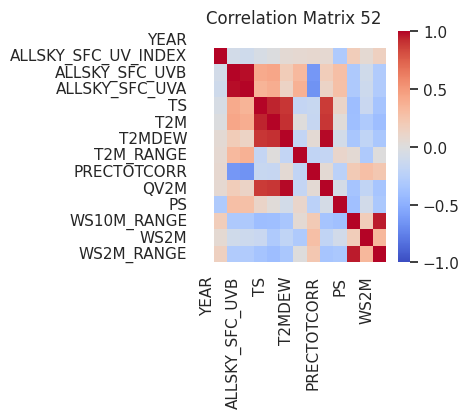

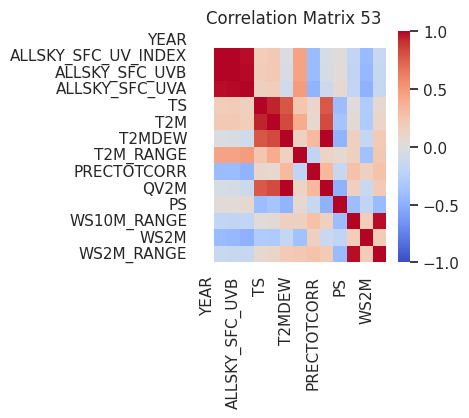

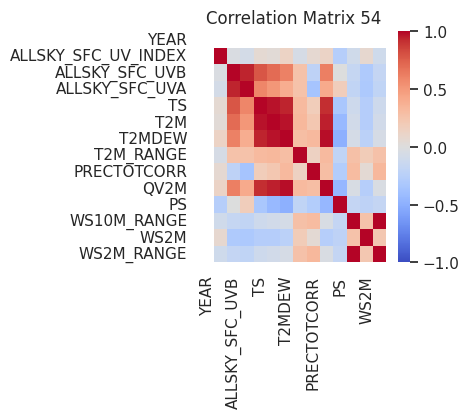

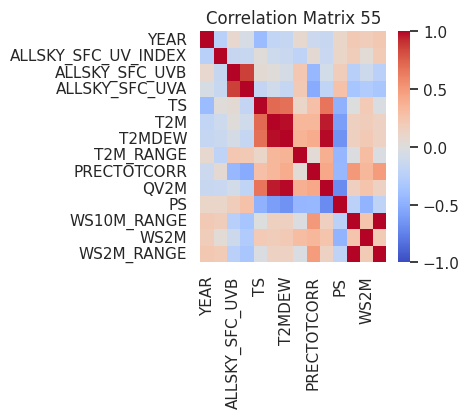

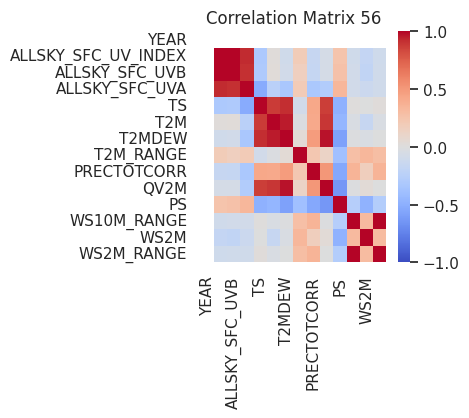

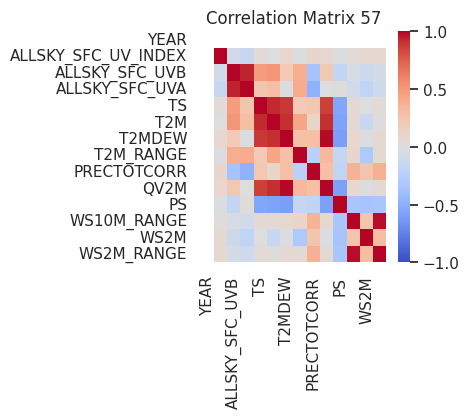

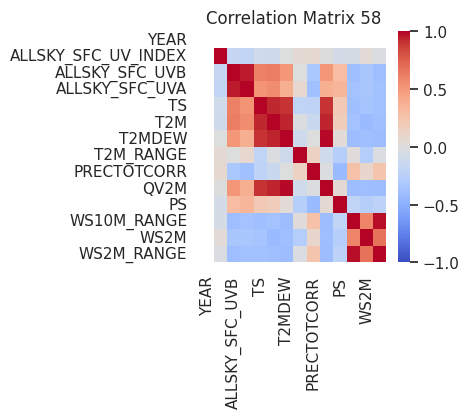

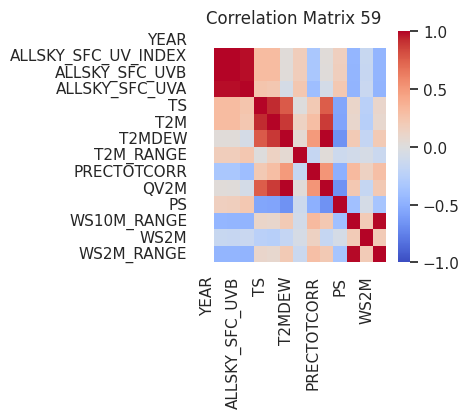

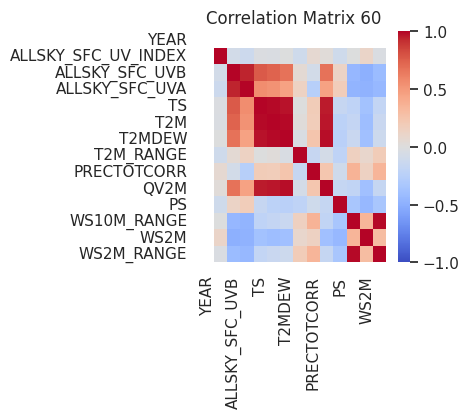

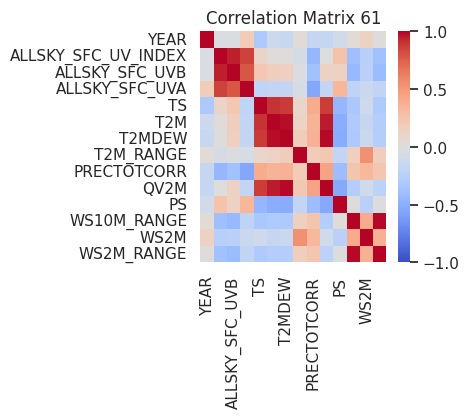

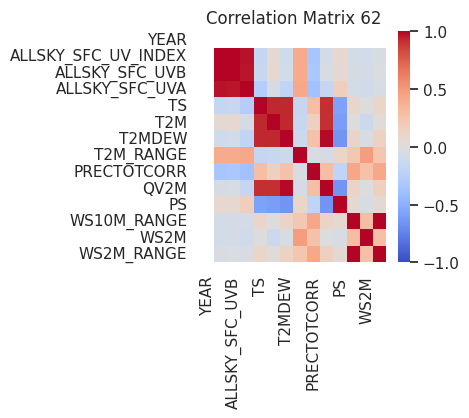

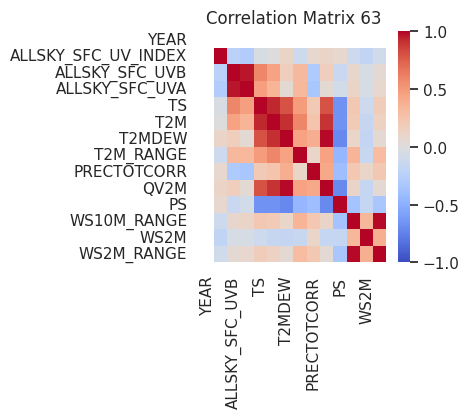

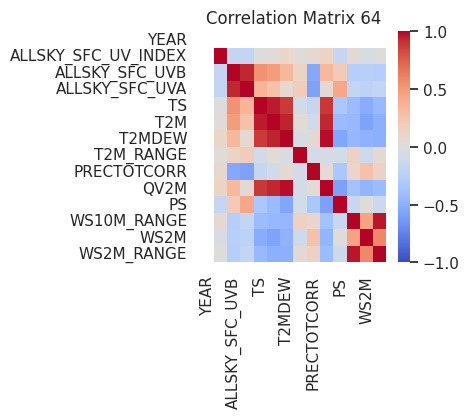

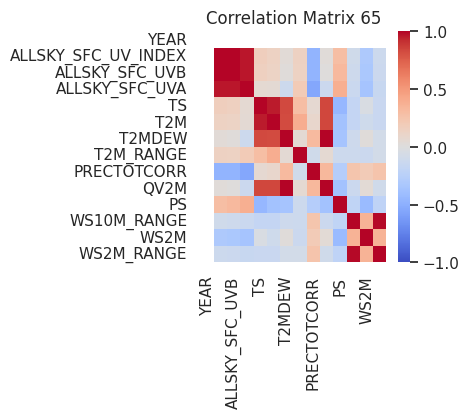

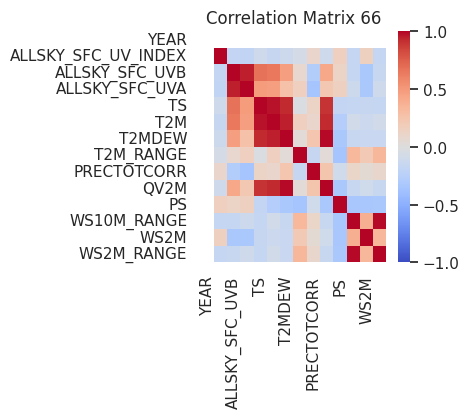

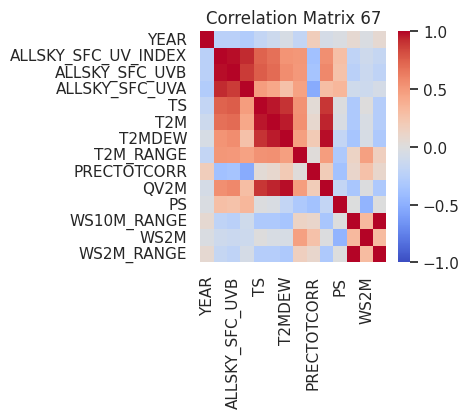

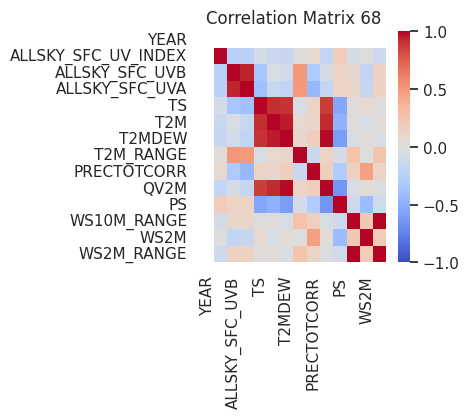

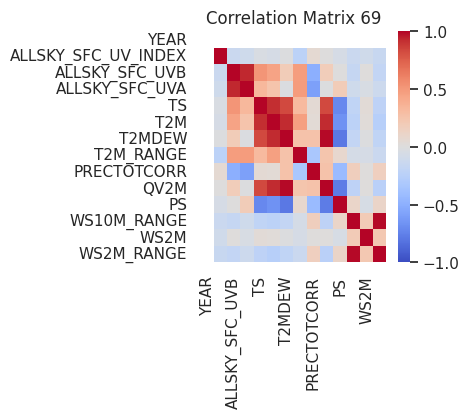

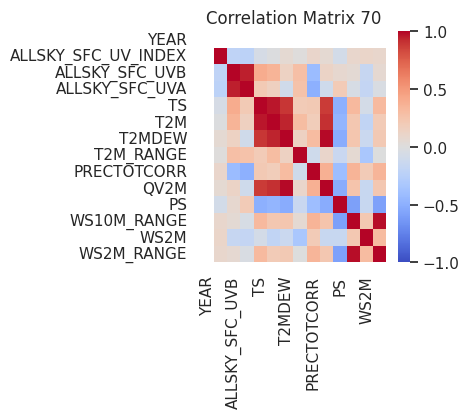

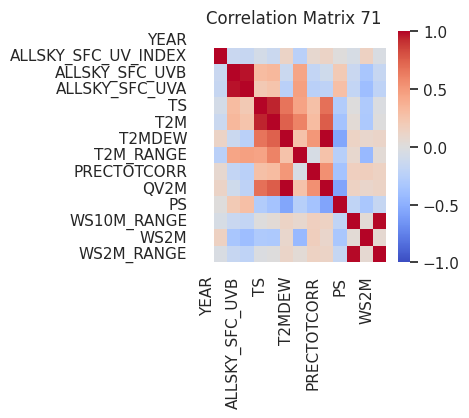

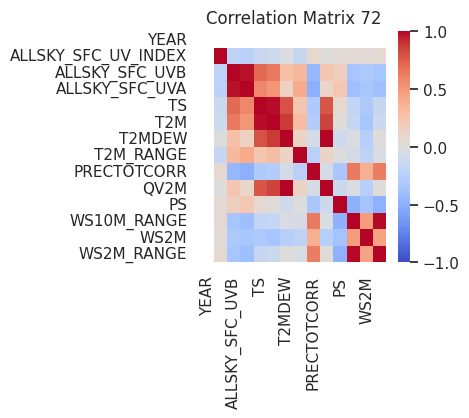

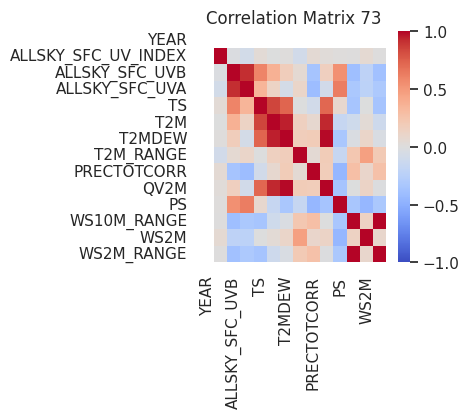

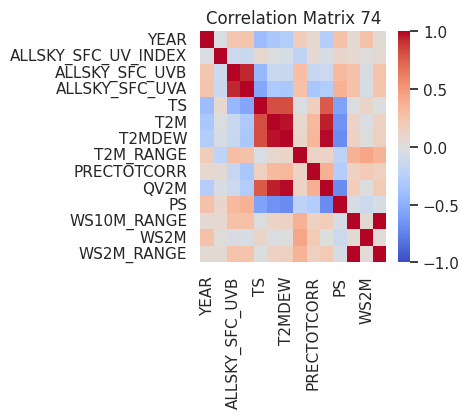

In [70]:
# Convert the 'DOY' column to datetime
data['Date'] = pd.to_datetime(data['DOY'].astype(str), format='%j')
data.drop(['DOY'], axis=1, inplace=True)

# Set the date column as the index
data.set_index('Date', inplace=True)

# Define the rolling window size (2 months)
window_size_days = 2 * 30  # Assuming an average of 30 days in a month

# Calculate the total number of days for 13 years
total_days = len(data)

# Calculate the number of windows based on the window size
num_windows = total_days // window_size_days

# Create a list to store the correlation matrices
correlation_matrices = []

# Generate rolling windows and calculate cross-correlation matrices
for i in range(0, total_days - window_size_days + 1, window_size_days):
    window_data = data.iloc[i:i+window_size_days]
    correlation_matrix = window_data.corr()
    correlation_matrices.append(correlation_matrix)

# Plot or analyze the correlation matrices as needed
# For example, you can visualize them using seaborn's heatmap
for idx, matrix in enumerate(correlation_matrices):
    plt.figure(figsize=(3, 3))
    sns.heatmap(matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"Correlation Matrix {idx+1}")
    plt.show()


Frame 1 to Frame 2 Distance: 0.23745820415868804
Frame 2 to Frame 3 Distance: 0.21612926602924878
Frame 3 to Frame 4 Distance: 0.271229305580888
Frame 4 to Frame 5 Distance: 0.22643900980595796
Frame 5 to Frame 6 Distance: 0.18757351123130026
Frame 6 to Frame 7 Distance: 0.22511729282802534
Frame 7 to Frame 8 Distance: 0.2513358746053793
Frame 8 to Frame 9 Distance: 0.16702982330419652
Frame 9 to Frame 10 Distance: 0.2046254342512101
Frame 10 to Frame 11 Distance: 0.21552060246379431
Frame 11 to Frame 12 Distance: 0.27410060852901424
Frame 12 to Frame 13 Distance: 0.1798045687479549
Frame 13 to Frame 14 Distance: 0.1726176824860744
Frame 14 to Frame 15 Distance: 0.15363511712703823
Frame 15 to Frame 16 Distance: 0.16009775547022925
Frame 16 to Frame 17 Distance: 0.1505821428522804
Frame 17 to Frame 18 Distance: 0.19846984968430184
Frame 18 to Frame 19 Distance: 0.24181079254427376
Frame 19 to Frame 20 Distance: 0.23494484349632946
Frame 20 to Frame 21 Distance: 0.16521853127369995
Fram

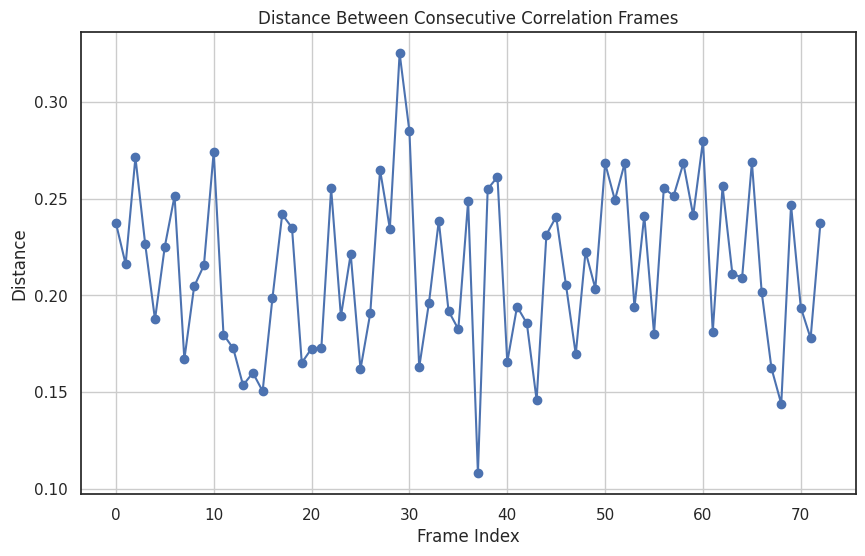

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read your data into a Pandas DataFrame (assuming you have it in a CSV file)
# Replace 'your_data.csv' with the actual file path
df = data

# Assuming your data has columns 'YEAR', 'DOY', and other parameters

# Convert 'YEAR' and 'DOY' columns to a datetime index
df['Date'] = pd.to_datetime(df['YEAR'].astype(str) + df['DOY'].astype(str), format='%Y%j')
df.set_index('Date', inplace=True)

# Define the rolling window size (2 months, assuming 1 month = 30 days)
window_size = 2 * 30

# Create an empty list to store the correlation frames
correlation_frames = []
correlation_frames
# Calculate rolling cross-correlation matrices for each two-month window
for year in range(df['YEAR'].min(), df['YEAR'].max() + 1):
    for month in range(1, 13, 2):
        start_date = f"{year}-{month:02d}-01"
        end_date = pd.to_datetime(start_date) + pd.DateOffset(months=2)
        window = df[start_date:end_date]
        corr_matrix = window.corr()
        correlation_frames.append(corr_matrix)


# Calculate the distance between these frames
def frame_distance(frame1, frame2):
    return np.abs(frame1 - frame2).mean().mean()

frame_distances = []

for i in range(len(correlation_frames) - 1):
    dist = frame_distance(correlation_frames[i], correlation_frames[i + 1])
    frame_distances.append(dist)

# Display the frame distances
for i, dist in enumerate(frame_distances):
    print(f"Frame {i+1} to Frame {i+2} Distance: {dist}")

# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(frame_distances, marker='o', linestyle='-', color='b')
plt.title('Distance Between Consecutive Correlation Frames')
plt.xlabel('Frame Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


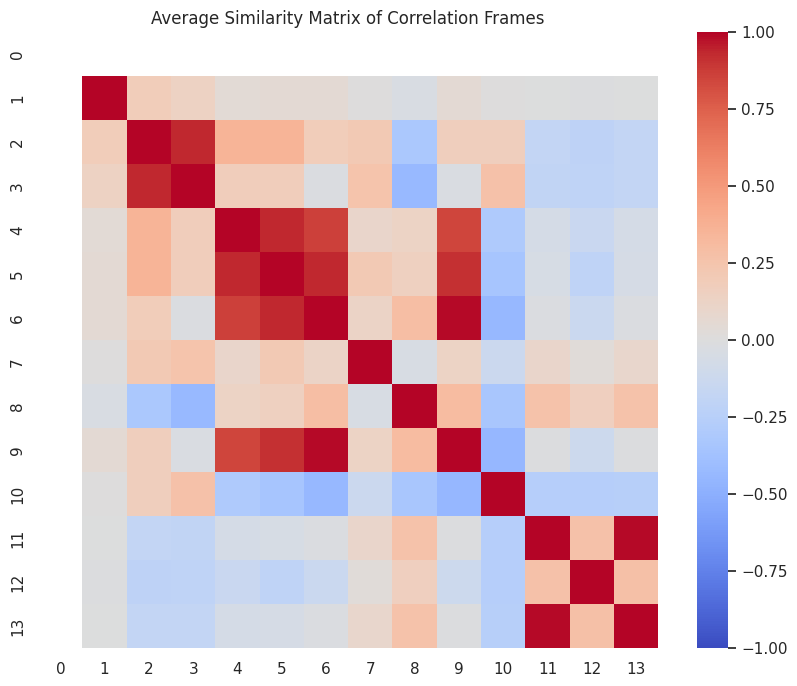

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/prj1_data.csv')

# Convert the 'DOY' column to datetime
data['Date'] = pd.to_datetime(data['DOY'].astype(str), format='%j')
data.drop(['DOY'], axis=1, inplace=True)

# Set the date column as the index
data.set_index('Date', inplace=True)

# Define the rolling window size (2 months)
window_size_days = 2 * 30  # Assuming an average of 30 days in a month

# Calculate the total number of days for 13 years
total_days = len(data)

# Create a list to store the correlation matrices
correlation_matrices = []

# Generate rolling windows and calculate cross-correlation matrices
for i in range(0, total_days - window_size_days + 1, window_size_days):
    window_data = data.iloc[i:i + window_size_days]
    correlation_matrix = window_data.corr()
    correlation_matrices.append(correlation_matrix)

# Create a single similarity matrix by averaging all correlation matrices
average_similarity_matrix = np.mean(correlation_matrices, axis=0)

# Plot the average similarity matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(average_similarity_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Average Similarity Matrix of Correlation Frames')
plt.show()
